In [3]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-02', end='2022-07-29')
df

AttributeError: 'NoneType' object has no attribute 'group'

In [ ]:
df.shape

(2661, 6)

AttributeError: ignored

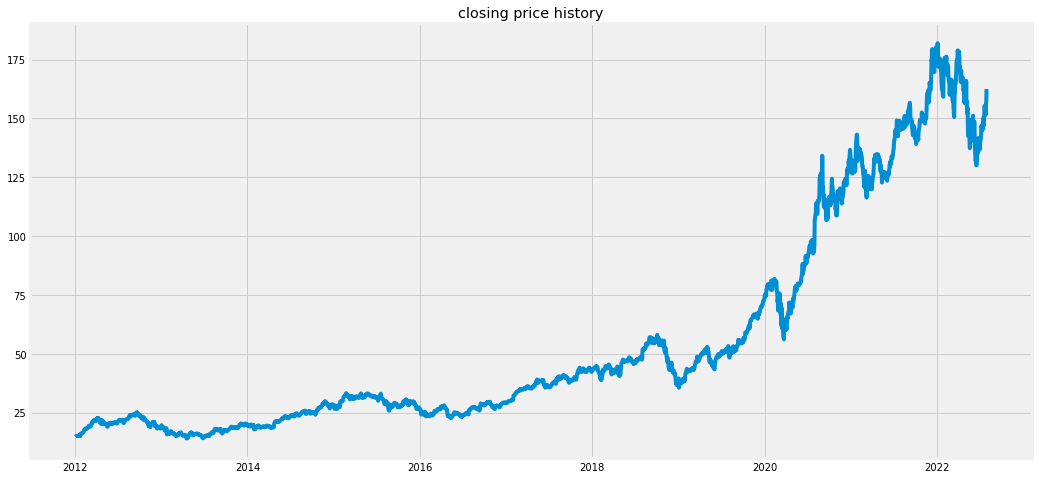

In [ ]:
plt.figure(figsize=(16,8))
plt.title('closing price history')
plt.plot(df['Close'])
plt.xlable('Date',fontsize=18)
plt.ylable('Closing price $',fontsize=18)
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2129

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.84993677],
       [0.85326894],
       [0.88397173]])

In [ ]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train =[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()


[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [ ]:
#cover the x and y _ train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1 ))
x_train.shape

(2069, 60, 1)

In [ ]:
#build lstm
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile mode
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
#train the model
model.fit(x_train,y_train, batch_size=1, epochs=1)

2069/2069 [==============================] - 65s 29ms/step - loss: 3.4831e-04


In [ ]:
# testing dataset
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [ ]:
x_test = np.array(x_test)
type(x_test)

numpy.ndarray

In [ ]:
x_test.shape[:]

(532, 60)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#get the model to predict the values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
#get the root mean sqr error ( RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2.194726140875565

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


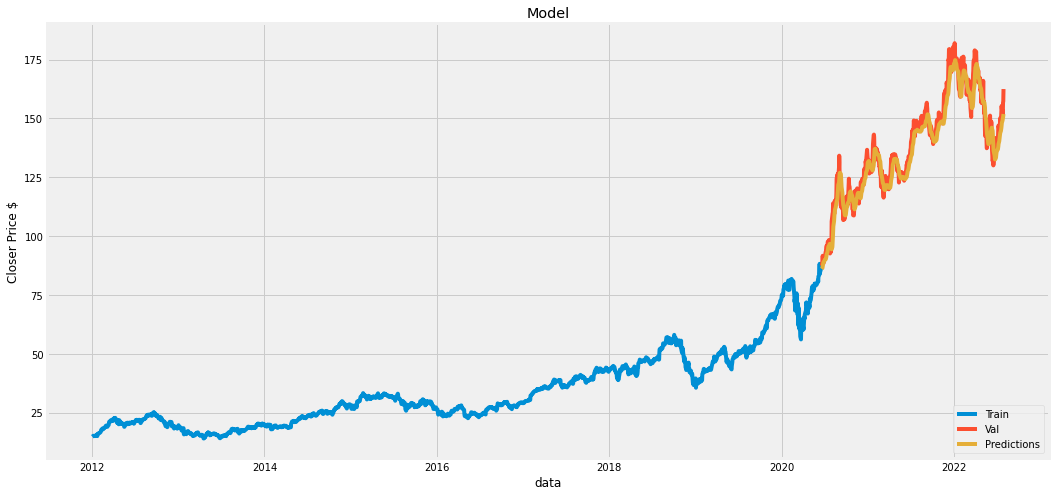

In [ ]:
#plot data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#view
plt.figure(figsize=(16,8))
plt.xlabel('data')
plt.title('Model')
plt.ylabel('Closer Price $')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:
#show actual and predicted prices
valid

,Close,Predictions
Date,,
2020-06-19,87.430000,86.046211
2020-06-22,89.717499,86.481361
2020-06-23,91.632500,87.006660
2020-06-24,90.014999,87.708359
2020-06-25,91.209999,88.309258
...,...,...
2022-07-25,152.949997,149.186523
2022-07-26,151.600006,149.989502
2022-07-27,156.789993,150.435410


In [ ]:
#get quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-02', end='2022-07-29')
#create df
new_df = apple_quote.filter(['Close'])
#get the last 60 days
last_60_days = new_df[-60:].values
#scale the data to be between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#conver the X_test to numpy array
X_test = np.array(X_test)
#Reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#get the prediction
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[153.14828]]


In [ ]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 4.4 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
web.__version__
!pip install --upgrade pandas-datareader
web.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'0.9.0'